In [127]:
# Loading librories
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import joblib
import pickle
import numpy as np
import os
import warnings
warnings.filterwarnings('ignore')

In [128]:
# Loading dataset
df = pd.read_csv("../data/WA_Fn-UseC_-Telco-Customer-Churn.csv")
print(df.shape)
df.head()

(7043, 21)


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [129]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [130]:
print(df.describe())

       SeniorCitizen       tenure  MonthlyCharges
count    7043.000000  7043.000000     7043.000000
mean        0.162147    32.371149       64.761692
std         0.368612    24.559481       30.090047
min         0.000000     0.000000       18.250000
25%         0.000000     9.000000       35.500000
50%         0.000000    29.000000       70.350000
75%         0.000000    55.000000       89.850000
max         1.000000    72.000000      118.750000


In [131]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [132]:
# Target balance check
df['Churn'].value_counts(normalize=True) * 100

Churn
No     73.463013
Yes    26.536987
Name: proportion, dtype: float64

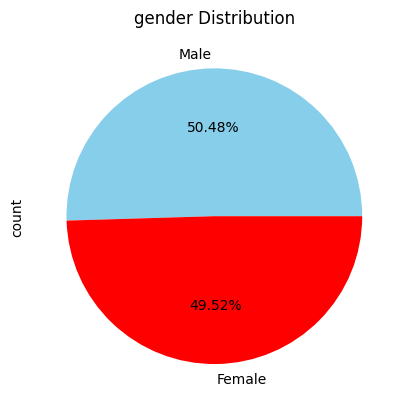

In [133]:
df['gender'].value_counts().plot.pie(autopct='%1.2f%%', labels=['Male','Female'], colors=['skyblue','red'])
plt.title("gender Distribution")
plt.show()

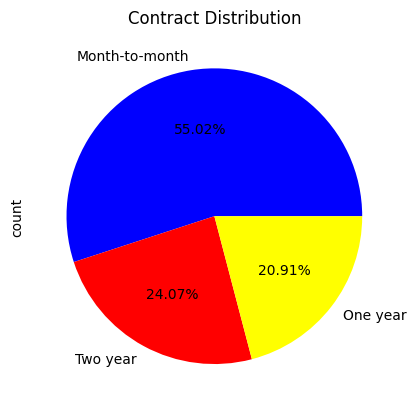

In [134]:
df["Contract"].value_counts().plot.pie(autopct='%1.2f%%', labels=['Month-to-month','Two year', "One year"], colors=['blue','red','yellow'])
plt.title("Contract Distribution")
plt.show()

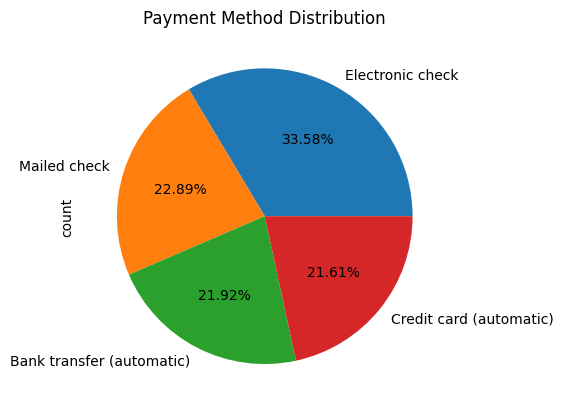

In [135]:
df["PaymentMethod"].value_counts().plot.pie(autopct="%1.2f%%", labels=["Electronic check", "Mailed check","Bank transfer (automatic)","Credit card (automatic)"])
plt.title("Payment Method Distribution")
plt.show()

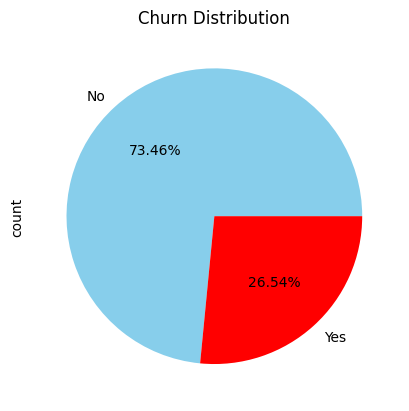

In [136]:
df['Churn'].value_counts().plot.pie(autopct='%1.2f%%', labels=['No','Yes'], colors=['skyblue','red'])
plt.title("Churn Distribution")
plt.show()

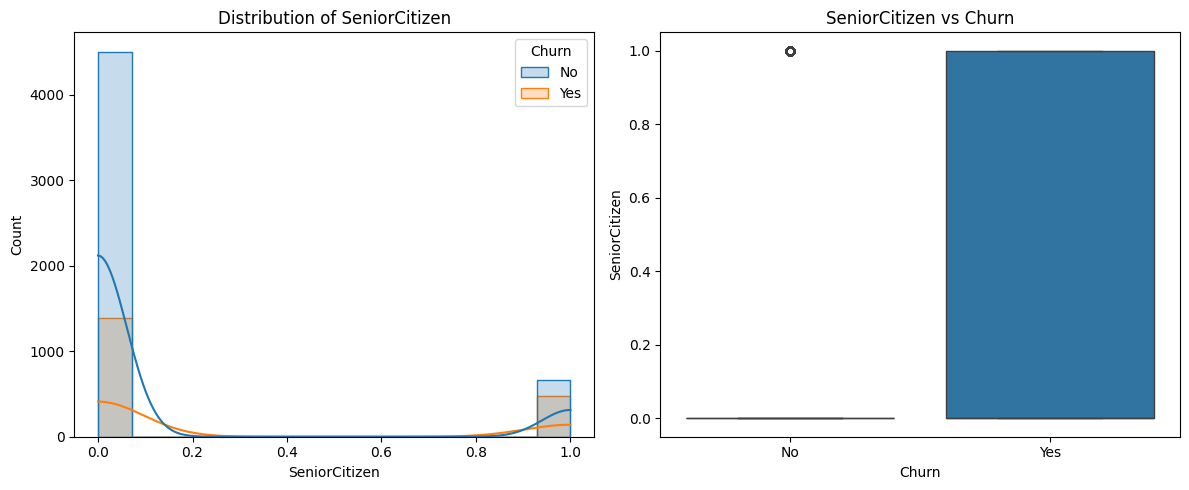

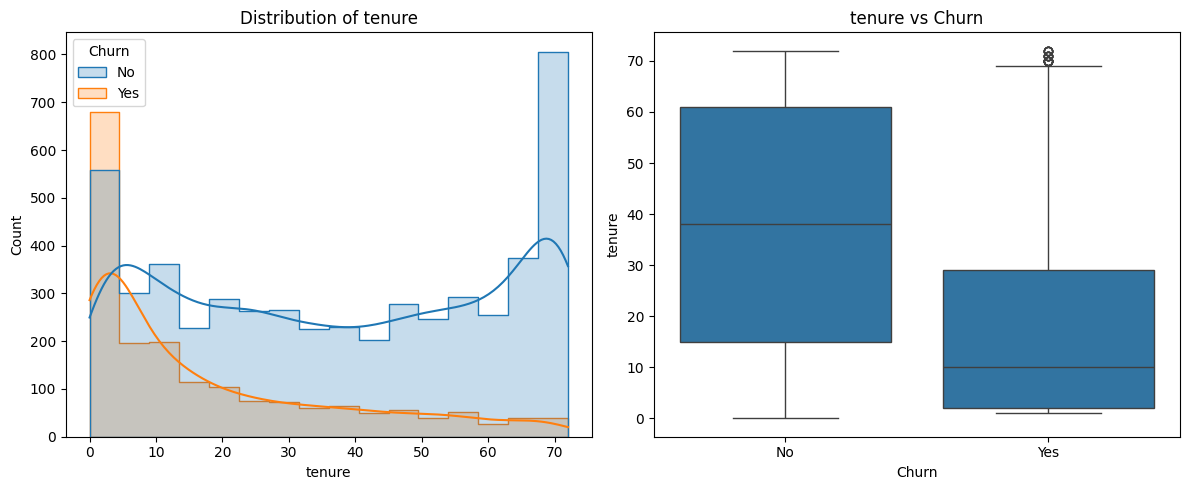

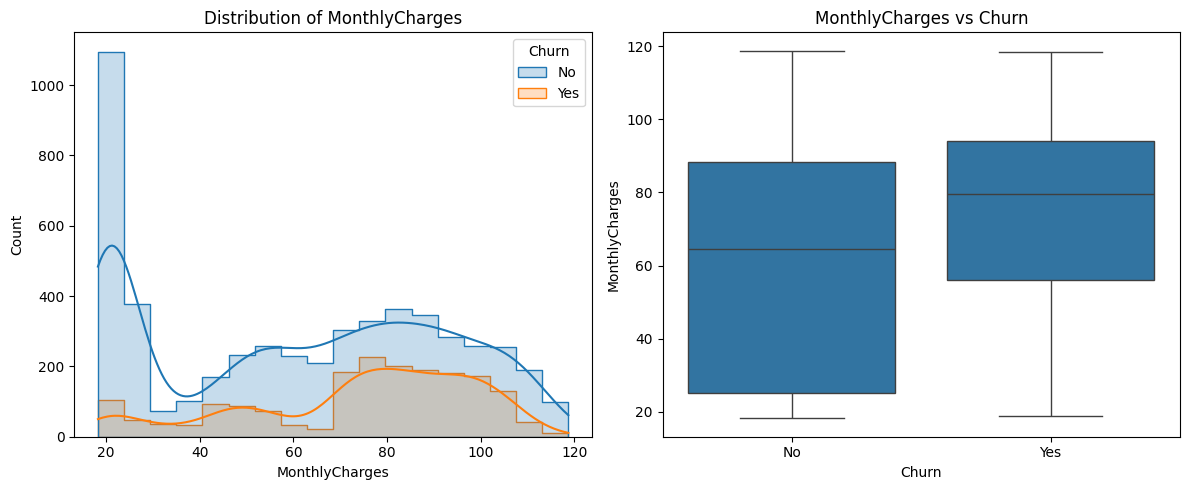

In [137]:
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
for col in numerical_cols:
    plt.figure(figsize=(12,5))

    plt.subplot(1,2,1)
    sns.histplot(data=df, x=col, kde=True, hue="Churn", element="step")
    plt.title(f"Distribution of {col}")

    plt.subplot(1,2,2)
    sns.boxplot(data=df, x="Churn", y=col)
    plt.title(f"{col} vs Churn")

    plt.tight_layout()
    plt.show()


In [138]:
# Fix the TotalCharges column
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors='coerce')
df.dropna(inplace=True)

In [139]:
df.drop('customerID', axis=1, inplace=True)

In [140]:
le = LabelEncoder()
for col in df.select_dtypes(include='object').columns:
    df[col] = le.fit_transform(df[col])


In [141]:
x = df.drop("Churn", axis=1)
y = df['Churn']

In [142]:
scaler = StandardScaler()
scaled_x = scaler.fit_transform(x)

In [143]:
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state=42, stratify=y)

In [144]:
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(x_train, y_train)

lr_pred = lr_model.predict(x_test)

In [145]:
print("Logistic Regression:\n")
print(classification_report(y_test, lr_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, lr_pred))
print("ROC AUC:", roc_auc_score(y_test, lr_pred))


Logistic Regression:

              precision    recall  f1-score   support

           0       0.85      0.88      0.86      1033
           1       0.63      0.57      0.60       374

    accuracy                           0.80      1407
   macro avg       0.74      0.72      0.73      1407
weighted avg       0.79      0.80      0.79      1407

Confusion Matrix:
 [[907 126]
 [161 213]]
ROC AUC: 0.7237719429935134


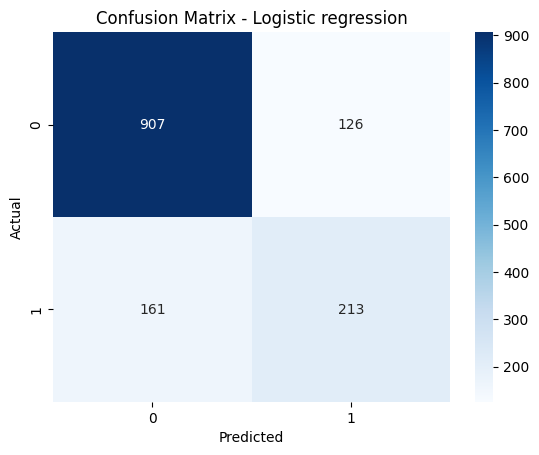

In [146]:
sns.heatmap(confusion_matrix(y_test, lr_pred), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - Logistic regression")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [147]:
os.makedirs("../models", exist_ok=True)

In [148]:
joblib.dump(lr_model, "../models/lr_model.pkl")
joblib.dump(scaler, "..//models/scaler.pkl")
joblib.dump(le, "..//models/LabelEncoder")

['..//models/LabelEncoder']